<a href="https://colab.research.google.com/github/alanralves/analise-exploratoria-de-acidentes-rodoviarios/blob/main/notebook_acidentes_rodoviarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ambiente e Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Carregamento

In [ ]:
df = pd.read_csv('datatran2024.csv', encoding='latin1', sep=';', low_memory=False)
df.head(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789,01/01/2024,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804,01/01/2024,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,"-4,29603281","-41,76732659",SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806,01/01/2024,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818,01/01/2024,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838,01/01/2024,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,"-16,17914141","-54,78905337",SPRF-MT,DEL02-MT,UOP01-DEL02-MT


Análise Descritiva

Criar categoria de gravidade

In [ ]:
def categorizar(row):
    if row['mortos'] > 0:
        return 'Fatais'
    elif row['feridos'] > 0:
        return 'Feridos'
    else:
        return 'Sem Vítimas'

df['gravidade_categoria'] = df.apply(categorizar, axis=1)

- 1. Frequência de tipos de acidente

In [ ]:
tipo_freq = df['tipo_acidente'].value_counts()
print(tipo_freq)

tipo_acidente
Colisão traseira                  11638
Saída de leito carroçável          8791
Colisão transversal                7761
Colisão lateral mesmo sentido      6546
Tombamento                         5311
Colisão com objeto                 4140
Colisão frontal                    3951
Queda de ocupante de veículo       2807
Atropelamento de Pedestre          2661
Colisão lateral sentido oposto     1663
Incêndio                           1452
Capotamento                        1169
Atropelamento de Animal            1092
Engavetamento                      1028
Eventos atípicos                    254
Derramamento de carga                90
Sinistro pessoal de trânsito         11
Name: count, dtype: int64


- 2. Proporção de gravidade

In [ ]:
prop_grav = df['gravidade_categoria'].value_counts(normalize=True)
print(prop_grav)

gravidade_categoria
Feridos        0.767001
Sem Vítimas    0.161816
Fatais         0.071184
Name: proportion, dtype: float64


- 3. Relação entre condições meteorológicas e gravidade

In [ ]:
ct_weather = pd.crosstab(
    df['condicao_metereologica'], df['gravidade_categoria'], normalize='index'
)
print(ct_weather)

gravidade_categoria       Fatais   Feridos  Sem Vítimas
condicao_metereologica                                 
Chuva                   0.065624  0.763134     0.171242
Céu Claro               0.074060  0.765413     0.160527
Garoa/Chuvisco          0.050524  0.761201     0.188275
Granizo                 0.000000  1.000000     0.000000
Ignorado                0.116220  0.696041     0.187739
Neve                    0.000000  1.000000     0.000000
Nevoeiro/Neblina        0.099511  0.729201     0.171289
Nublado                 0.066960  0.769115     0.163925
Sol                     0.054562  0.814792     0.130646
Vento                   0.067961  0.747573     0.184466


- 4. Gravidade vs Tipo de Pista

In [ ]:
tct_pista = pd.crosstab(
    df['tipo_pista'], df['gravidade_categoria'], normalize='index'
)
print(tct_pista)

gravidade_categoria    Fatais   Feridos  Sem Vítimas
tipo_pista                                          
Dupla                0.047299  0.781349     0.171352
Múltipla             0.040744  0.815046     0.144210
Simples              0.098139  0.744763     0.157098


- 5. Gravidade vs Hora do Acidente

In [ ]:
df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour

tct_hora = pd.crosstab(
    df['hora'], df['gravidade_categoria'], normalize='index'
).fillna(0)
tct_hora = tct_hora.astype(float)
tct_hora = tct_hora[tct_hora.sum(axis=1) > 0]
print(tct_hora)

gravidade_categoria    Fatais   Feridos  Sem Vítimas
hora                                                
0                    0.101751  0.646372     0.251877
1                    0.105076  0.618878     0.276046
2                    0.125255  0.589613     0.285132
3                    0.120183  0.601835     0.277982
4                    0.111198  0.620987     0.267815
5                    0.114180  0.664896     0.220924
6                    0.069828  0.792756     0.137416
7                    0.046301  0.841180     0.112519
8                    0.043805  0.827395     0.128800
9                    0.037157  0.808562     0.154281
10                   0.043444  0.793049     0.163507
11                   0.060094  0.807541     0.132364
12                   0.049232  0.809374     0.141394
13                   0.055792  0.810539     0.133669
14                   0.053022  0.793920     0.153058
15                   0.056710  0.789977     0.153314
16                   0.048686  0.798088     0.

<ipython-input-10-cd35da0f64b6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour


- 6. Análise de texto das causas

In [ ]:
words = (
    df['causa_acidente']
    .dropna()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.split()
    .explode()
)
stopwords = {'de','do','da','em','e','o','a','que','na','no','por','com','para'}
top_15 = words[~words.isin(stopwords)].value_counts().head(15)
print(top_15)

causa_acidente
condutor       27312
reação         17804
ou             13510
ineficiente     9004
tardia          9000
ausência        8965
via             5998
sem             5823
presença        5823
observar        5768
outros          5768
dos             5768
acessar         5768
veículos        5768
faixa           3956
Name: count, dtype: int64


# Resultados

- Frequência de Tipos de Acidente

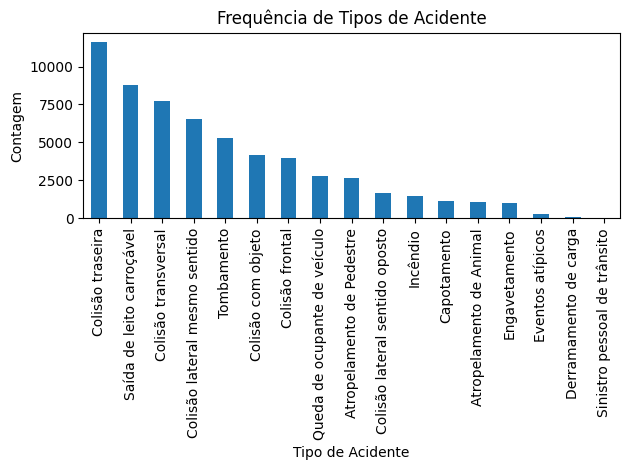

In [ ]:
plt.figure()
tipo_freq.plot(kind='bar')
plt.title('Frequência de Tipos de Acidente')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

- Proporção de Gravidade dos Acidentes

In [ ]:
display(prop_grav)

,proportion
gravidade_categoria,
Feridos,0.767001
Sem Vítimas,0.161816
Fatais,0.071184


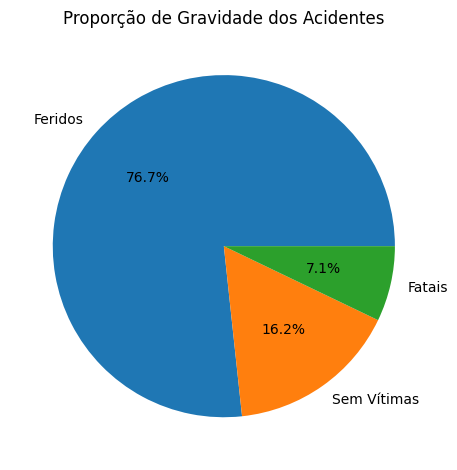

In [ ]:
plt.figure()
prop_grav.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporção de Gravidade dos Acidentes')
plt.ylabel('')
plt.tight_layout()
plt.show()

- Gravidade x Condição Meteorológica

<Figure size 640x480 with 0 Axes>

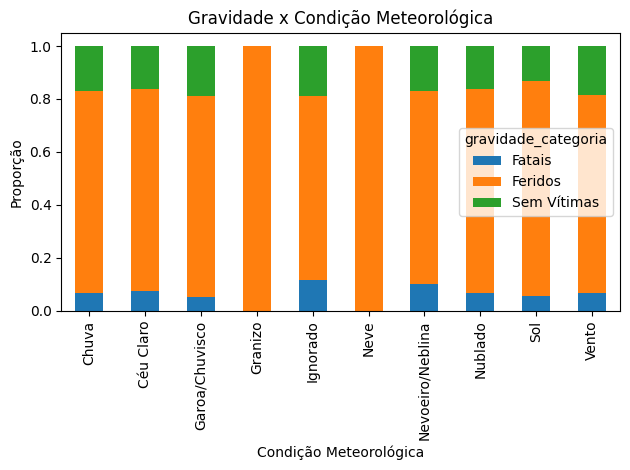

In [ ]:
plt.figure()
ct_weather.plot(kind='bar', stacked=True)
plt.title('Gravidade x Condição Meteorológica')
plt.xlabel('Condição Meteorológica')
plt.ylabel('Proporção')
plt.tight_layout()
plt.show()

- Gravidade x Tipo de Pista

<Figure size 640x480 with 0 Axes>

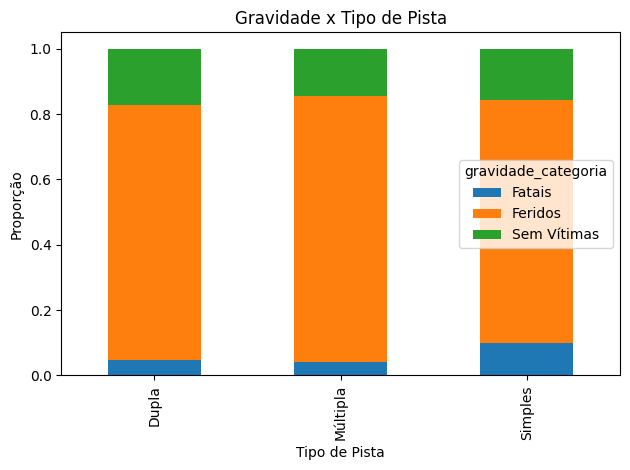

In [ ]:
plt.figure()
tct_pista.plot(kind='bar', stacked=True)
plt.title('Gravidade x Tipo de Pista')
plt.xlabel('Tipo de Pista')
plt.ylabel('Proporção')
plt.tight_layout()
plt.show()

- Acidentes x Horário

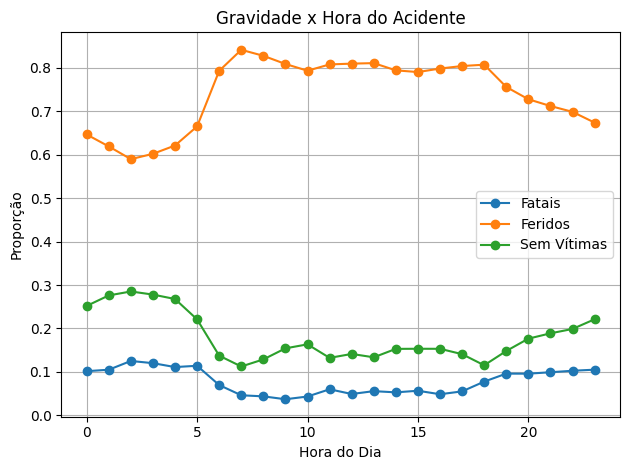

In [ ]:
plt.figure()
for categoria in tct_hora.columns:
    plt.plot(tct_hora.index, tct_hora[categoria], marker='o', label=categoria)

plt.title('Gravidade x Hora do Acidente')
plt.xlabel('Hora do Dia')
plt.ylabel('Proporção')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()